## Overview

In this project we will explore the time sensitivity and spot price sensitivity of call and put options

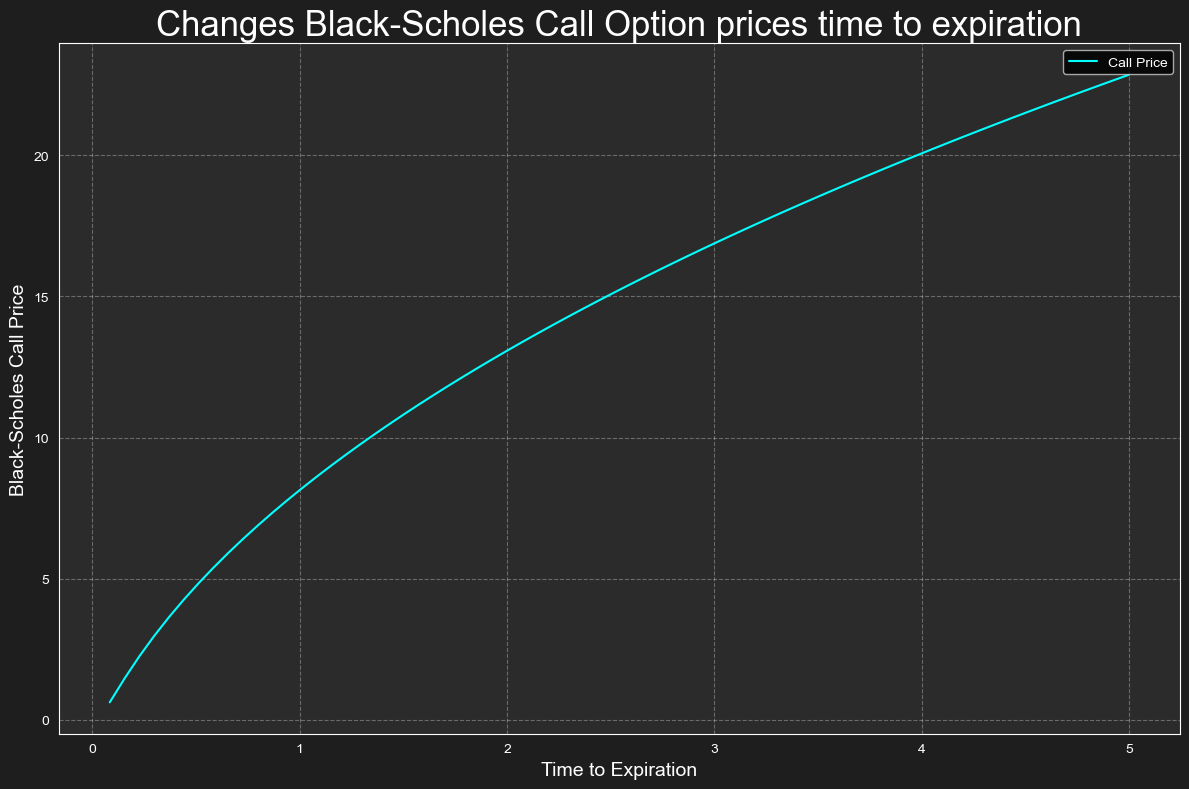

In [10]:
#project 3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

plt.style.use("dark_background")

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#1e1e1e')   # Figure background
ax.set_facecolor('#2b2b2b')          # Axes background

# Plot the data
ax.plot(times, call_prices, color='cyan', label='Call Price')

# Titles and labels
ax.set_title('Changes Black-Scholes Call Option prices time to expiration', fontsize=25, color='white')
ax.set_xlabel('Time to Expiration', fontsize=14, color='white')
ax.set_ylabel('Black-Scholes Call Price', fontsize=14, color='white')

# Customize grid and ticks
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.3)

# Optional: add legend
ax.legend()

plt.tight_layout()
plt.show()


In [4]:
print("1. Far from expiration, the call option’s price changes gradually over time, showing relatively slow movement in the earlier stages.")
print("2. As expiration approaches, the rate at which the call price drops accelerates, resulting in a noticeably steeper decline near the end.")
print("3. Overall, the call option loses value as time runs out, with its price falling steadily as the expiration date gets closer (i.e., as we move left along the time axis).")

1. Far from expiration, the call option’s price changes gradually over time, showing relatively slow movement in the earlier stages.
2. As expiration approaches, the rate at which the call price drops accelerates, resulting in a noticeably steeper decline near the end.
3. Overall, the call option loses value as time runs out, with its price falling steadily as the expiration date gets closer (i.e., as we move left along the time axis).


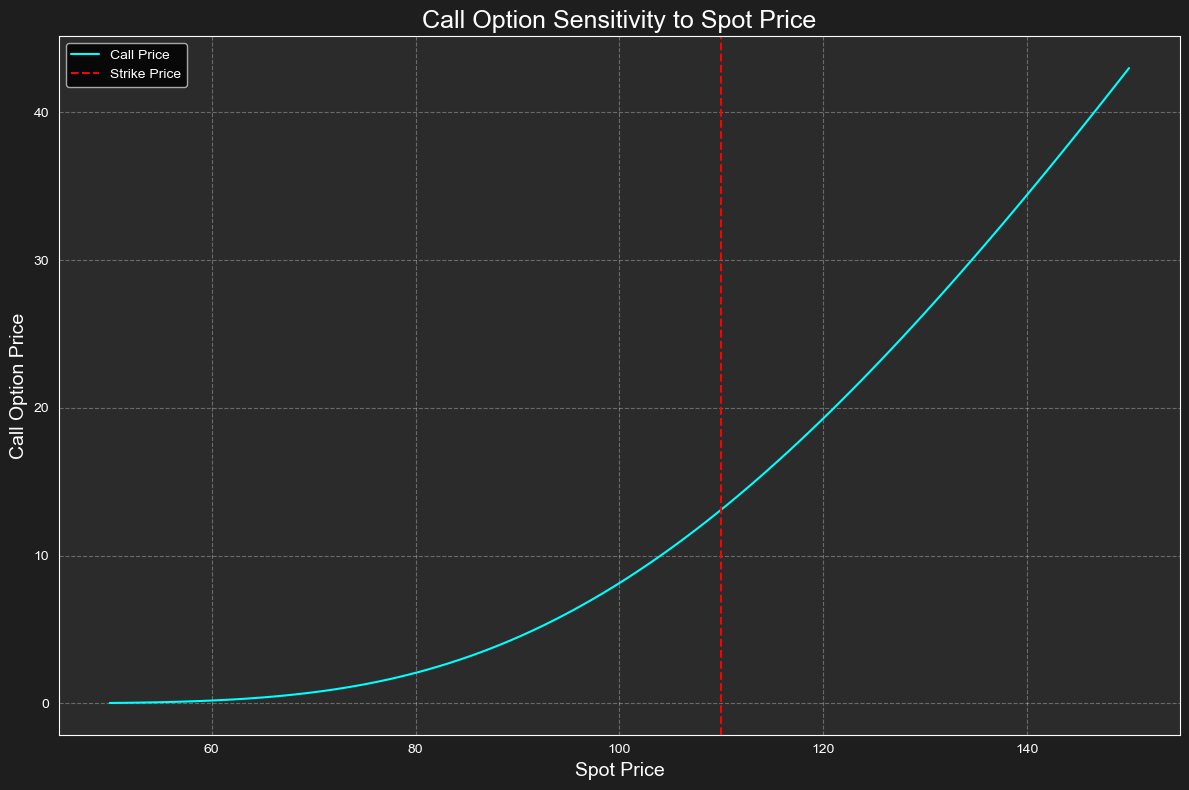

In [6]:
# Given the simplicity of drawing this graph I decided to play with background color
plt.style.use("dark_background")

# Generate spot prices
spot_prices = np.linspace(50, 150, 100)
call_prices = [bs_call(S, K, sigma) for S in spot_prices]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#1e1e1e')   # Set the figure background color
ax.set_facecolor('#2b2b2b')          # Set the plot (axes) background color

# Plot data
ax.plot(spot_prices, call_prices, color='cyan', label='Call Price')
ax.axvline(K, color='red', linestyle='--', label='Strike Price')

# Titles and labels
ax.set_title('Call Option Sensitivity to Spot Price', fontsize=18, color='white')
ax.set_xlabel('Spot Price', fontsize=14, color='white')
ax.set_ylabel('Call Option Price', fontsize=14, color='white')

# Customizing ticks and grid
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.3)

# Legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

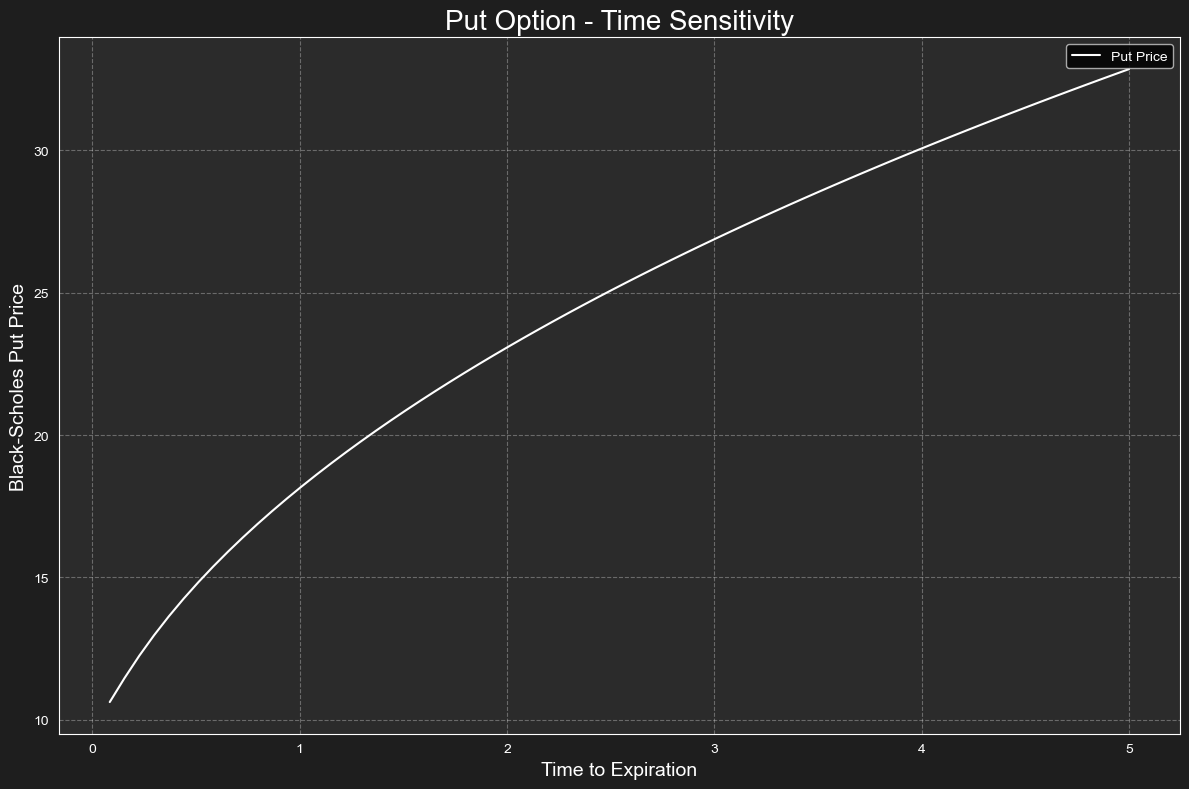

In [12]:
put_prices = [bs_put(S0, K, sigma, t=times[i]) for i in range(len(times))]

# Apply dark style
plt.style.use("dark_background")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#1e1e1e')   # Overall figure background
ax.set_facecolor('#2b2b2b')          # Plot background

# Plot the data
ax.plot(times, put_prices, color='white', label='Put Price')  # Use magenta for contrast

# Labels and title
ax.set_title('Put Option - Time Sensitivity', fontsize=20, color='white')
ax.set_xlabel('Time to Expiration', fontsize=14, color='white')
ax.set_ylabel('Black-Scholes Put Price', fontsize=14, color='white')

# Style ticks and grid
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.3)

# Optional: legend
ax.legend()

plt.tight_layout()
plt.show()

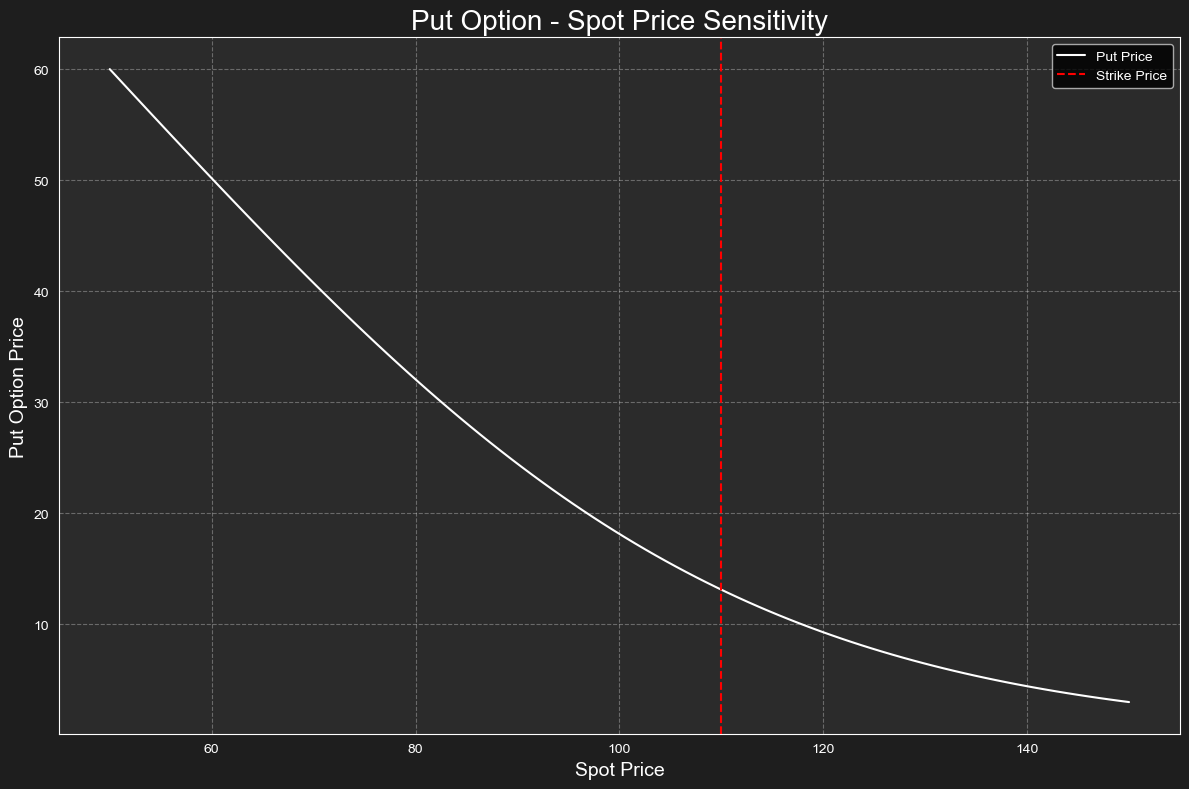

In [13]:
put_prices_spot = [bs_put(S, K, sigma) for S in spot_prices]

# Apply dark background style
plt.style.use("dark_background")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#1e1e1e')   # Figure background
ax.set_facecolor('#2b2b2b')          # Plot area background

# Plot the data
ax.plot(spot_prices, put_prices_spot, color='white', label='Put Price')
ax.axvline(x=K, color='red', linestyle='--', label='Strike Price')

# Title and axis labels
ax.set_title('Put Option - Spot Price Sensitivity', fontsize=20, color='white')
ax.set_xlabel('Spot Price', fontsize=14, color='white')
ax.set_ylabel('Put Option Price', fontsize=14, color='white')

# Customize ticks and grid
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.3)

# Legend
ax.legend()

plt.tight_layout()
plt.show()

## Observations

Call and put options are both affected by time and the underlying asset’s price, but in different ways. As time passes, both types of options lose value due to time decay (theta), and this loss accelerates as expiration nears. Long-dated options decay more slowly, while short-dated options see a sharper drop in value. In terms of price sensitivity, a call option increases in value when the spot price rises (positive delta), especially when it’s in the money, while its value drops near zero when the spot is far below the strike. Conversely, a put option loses value when the spot price rises (negative delta); it gains value as the spot drops far below the strike, and becomes nearly worthless when the spot is much higher than the strike. Overall, calls and puts react in opposite ways to spot price changes but are both similarly impacted by the passage of time.

## Future improvements:

I'd like to further analyze the greeks and connect the observation to my own theoretical knowledge from probability theory